<a href="https://colab.research.google.com/github/rimosoma/neural/blob/main/Lab2_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MACHINE LEARNING AND NEURAL NETWORKS, A.A. 2025/2026**

**COMPUTER LAB 2** - Model fitting and classification

**Duration: 6 hours**

**Exercise 1 – Model fitting for continuous distributions: Multivariate Gaussian**

In this exercise, you will employ a dataset based on the classic dataset *Iris Plants Database* https://archive.ics.uci.edu/ml/datasets/iris. You will be provided a subset of this dataset comprised of only two classes (*Iris Setosa* and *Iris Versicolour*), and only two features per class (*petal length* in cm and *petal width* in cm). The objective is to the determine which type of iris based on the content of the features.

**Task:** you have to fit class-conditional Gaussian multivariate distributions to the data and visualize the probability density functions. In particular, you should perform the following:


*   Divide the dataset in two parts (*Iris Setosa* which corresponds to class 0 and *Iris Versicolour* which correspond to class 1), and then work only on one class at a time.
*   Plot the data of each class (use the *plt.scatter( )* function)
*   Visualize the histogram of petal length and petal width (use e.g. the *plt.hist( )* function)
*   Calculate the maximum likelihood estimate of the mean and covariance matrix under a multivariate Gaussian model, independently for each class (these are the parameters of the class-conditional distributions). Note: is the Gaussian model good for these data?
*    Visualize the 2-D joint pdf of petal length and width for the two classes.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

Dataset1 = h5py.File("/content/Lab2_Ex_1_Iris.hdf5")
Data = np.array(Dataset1.get('Dataset'))

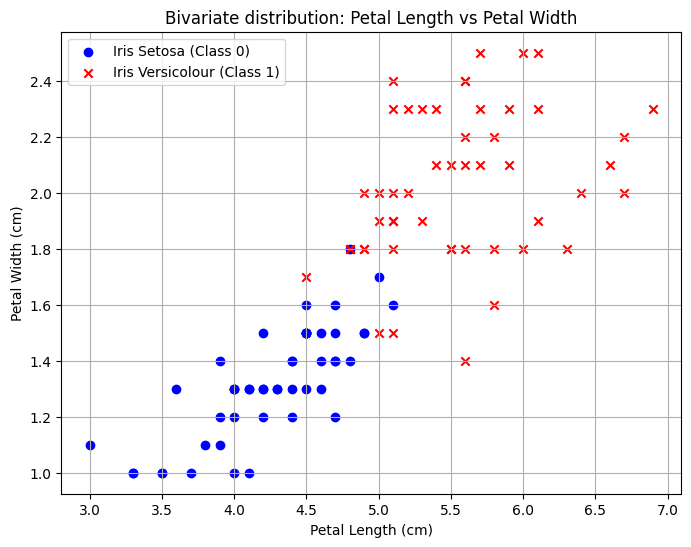

In [4]:
# Separate the dataset in the two classes, you can use the numpy function argsort and unique to do this.
# Draw the scatter plot of the two classes on the same image

# Le classi si trovano nella colonna 2 (indice 2)
Classes = Data[:, 2]
Features = Data[:, :2] # Features: Petal Length (col 0) e Petal Width (col 1)

# Ottieni gli indici per ogni classe
indices_class0 = np.where(Classes == 0)
indices_class1 = np.where(Classes == 1)

# Estrai le features per ogni classe
Features_class0 = Features[indices_class0]
Features_class1 = Features[indices_class1]

# Separa le features in Petal Length e Petal Width per ogni classe per il plotting
Points_Class0_Feature0 = Features_class0[:, 0] # Petal Length - Classe 0
Points_Class0_Feature1 = Features_class0[:, 1] # Petal Width - Classe 0
Points_Class1_Feature0 = Features_class1[:, 0] # Petal Length - Classe 1
Points_Class1_Feature1 = Features_class1[:, 1] # Petal Width - Classe 1

# Scatter Plot delle due classi
plt.figure(figsize=(8, 6))
plt.scatter(Points_Class0_Feature0, Points_Class0_Feature1, label='Iris Setosa (Class 0)', marker='o', c='blue')
plt.scatter(Points_Class1_Feature0, Points_Class1_Feature1, label='Iris Versicolour (Class 1)', marker='x', c='red')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Bivariate distribution: Petal Length vs Petal Width')
plt.legend()
plt.grid(True)
plt.show()

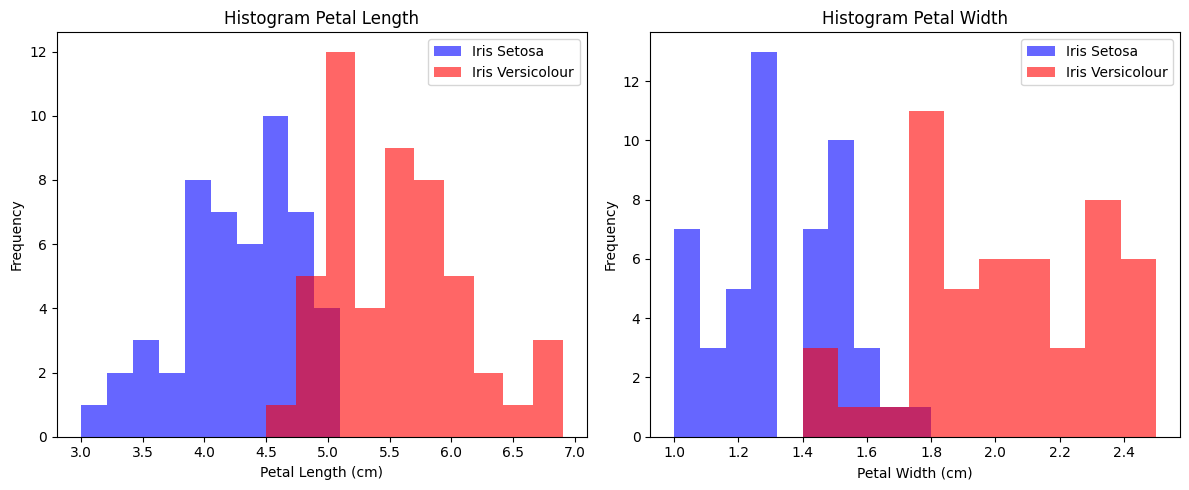

In [6]:
# Visualize the histogram of petal length and petal width (use e.g. the plt.hist() function)

# Istogrammi per Petal Length (Feature 0)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(Points_Class0_Feature0, bins=10, alpha=0.6, label='Iris Setosa', color='blue')
plt.hist(Points_Class1_Feature0, bins=10, alpha=0.6, label='Iris Versicolour', color='red')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Frequency')
plt.title('Histogram Petal Length')
plt.legend()

# Istogrammi per Petal Width (Feature 1)
plt.subplot(1, 2, 2)
plt.hist(Points_Class0_Feature1, bins=10, alpha=0.6, label='Iris Setosa', color='blue')
plt.hist(Points_Class1_Feature1, bins=10, alpha=0.6, label='Iris Versicolour', color='red')
plt.xlabel('Petal Width (cm)')
plt.ylabel('Frequency')
plt.title('Histogram Petal Width')
plt.legend()

plt.tight_layout()
plt.show()

# Nota: Osservando gli istogrammi, in particolare quelli per la classe 0 (Iris Setosa), la distribuzione sembra
# approssimativamente unimodale, suggerendo che un modello gaussiano potrebbe essere ragionevole,
# anche se si nota una certa asimmetria e non una perfetta campana.

In [7]:
# Calculate mean and covariance matrix under a multivariate Gaussian model.

N0 = Features_class0.shape[0]
N1 = Features_class1.shape[0]

# --- Classe 0: Iris Setosa ---
# 1. Media campionaria (Maximum Likelihood Estimate of Mean)
mean_class0 = np.mean(Features_class0, axis=0)

# 2. Matrice di Covarianza campionaria (Maximum Likelihood Estimate of Covariance)
# Calcolo la differenza tra ogni punto e la media
diff_class0 = Features_class0 - mean_class0
# La covarianza è (1/N) * sum((x_i - mu) * (x_i - mu).T)
# np.matmul(diff_class0.T, diff_class0) calcola sum((x_i - mu).T * (x_i - mu)) se le dimensioni fossero (2xN)x(Nx2),
# ma con (Nx2).T * (Nx2) calcola sum((x_i - mu)_r * (x_i - mu)_c) con r, c le features.
# Un modo standard per la covarianza campionaria non corretta è np.cov(..., bias=True)
cov_class0 = np.cov(Features_class0, rowvar=False, bias=True)

# Oppure, usando le istruzioni fornite:
# cov_class0_manual = np.zeros((2, 2))
# for x in diff_class0:
#     # x[:, np.newaxis] è (2x1), np.transpose(x[:, np.newaxis]) è (1x2)
#     cov_class0_manual += np.matmul(x[:, np.newaxis], np.transpose(x[:, np.newaxis]))
# cov_class0_manual /= N0

print("--- Class 0 (Iris Setosa) ---")
print(f"Mean (mean_class0):\n{mean_class0}")
print(f"Covariance (cov_class0):\n{cov_class0}")
print("-" * 30)


# --- Classe 1: Iris Versicolour ---
# 1. Media campionaria
mean_class1 = np.mean(Features_class1, axis=0)

# 2. Matrice di Covarianza campionaria
cov_class1 = np.cov(Features_class1, rowvar=False, bias=True)

# Oppure, usando le istruzioni fornite:
# diff_class1 = Features_class1 - mean_class1
# cov_class1_manual = np.zeros((2, 2))
# for x in diff_class1:
#     cov_class1_manual += np.matmul(x[:, np.newaxis], np.transpose(x[:, np.newaxis]))
# cov_class1_manual /= N1

print("--- Class 1 (Iris Versicolour) ---")
print(f"Mean (mean_class1):\n{mean_class1}")
print(f"Covariance (cov_class1):\n{cov_class1}")
print("-" * 30)

# Nota sul modello Gaussiano: Il modello Gaussiano è generalmente una buona prima approssimazione
# per dati biologici o naturali. La sua bontà dipende dalla reale distribuzione dei dati.
# In questo caso, data la forma degli istogrammi e lo scatter plot, l'approssimazione è decente.

--- Class 0 (Iris Setosa) ---
Mean (mean_class0):
[4.26  1.326]
Covariance (cov_class0):
[[0.2164   0.07164 ]
 [0.07164  0.038324]]
------------------------------
--- Class 1 (Iris Versicolour) ---
Mean (mean_class1):
[5.552 2.026]
Covariance (cov_class1):
[[0.298496 0.047848]
 [0.047848 0.073924]]
------------------------------


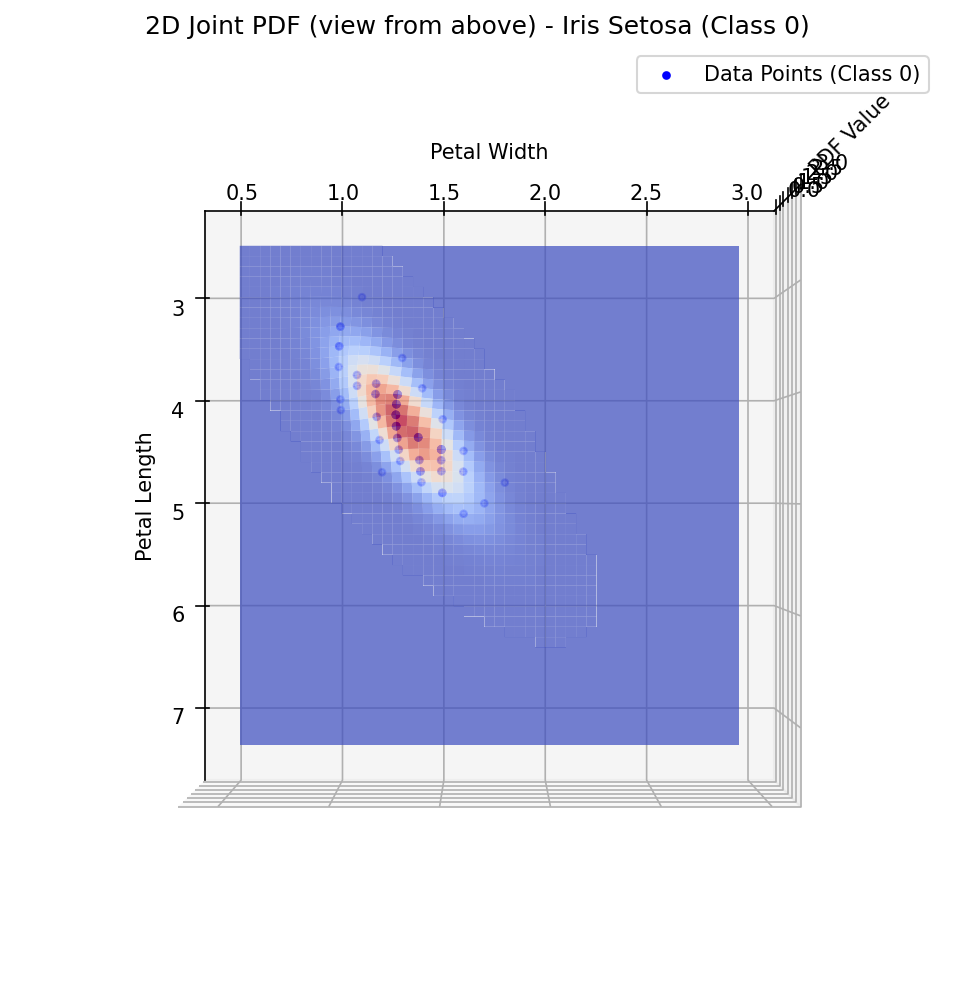

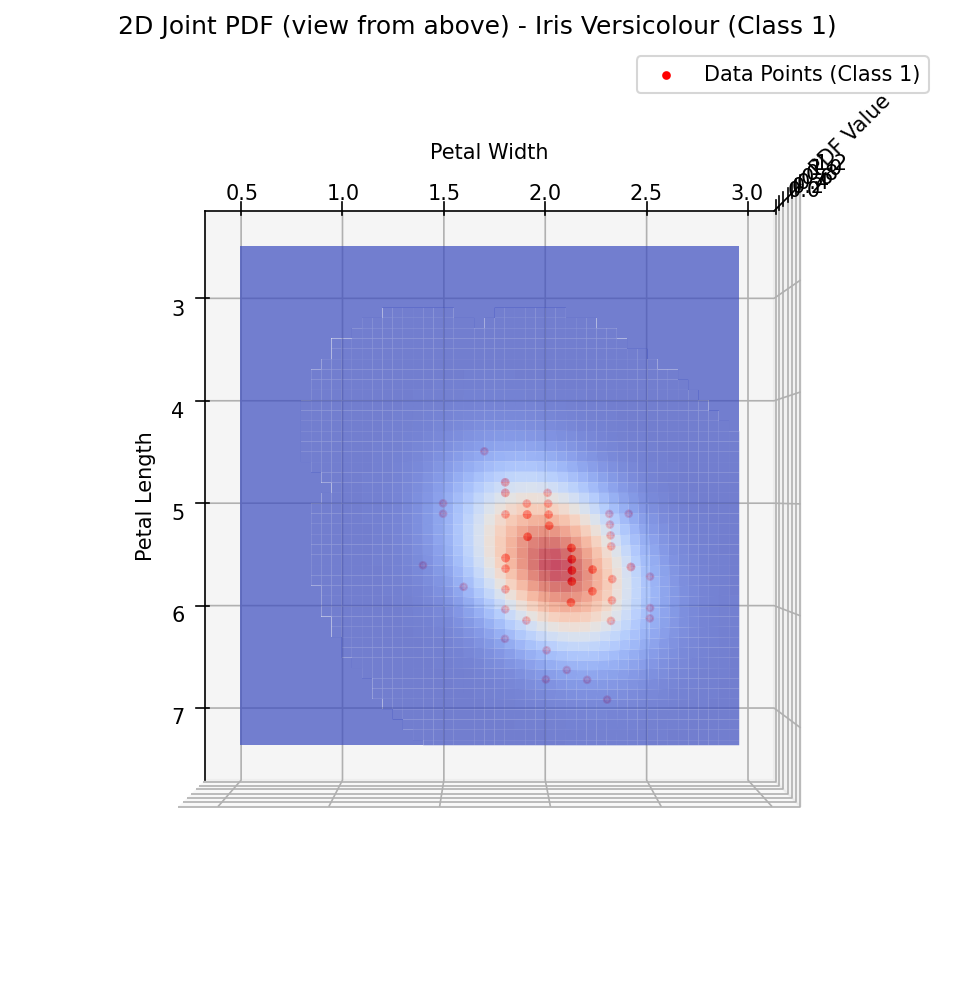

In [8]:
#Visualize the 2-D joint pdf of petal length and width, a pdf function can be initialized by providing mean and covariance matrix
from scipy.stats import multivariate_normal
from matplotlib import cm
from matplotlib.ticker import LinearLocator

pdf_class0 = multivariate_normal(mean=mean_class0, cov=cov_class0)
pdf_class1 = multivariate_normal(mean=mean_class1, cov=cov_class1)

#Create a grid of x and y values on which to sample the pdf, this is done by providing a list of x-y of coordinates to the function pdf_class0.pdf(...)
#A 3D view of the pdf can be obtained using the function ax.plot_surface

# Determina i limiti per la griglia
min_f0 = np.min(Features[:, 0]) - 0.5
max_f0 = np.max(Features[:, 0]) + 0.5
min_f1 = np.min(Features[:, 1]) - 0.5
max_f1 = np.max(Features[:, 1]) + 0.5

#Code Example:

X = np.arange(min_f0, max_f0, 0.05)
Y = np.arange(min_f1, max_f1, 0.05)

X, Y = np.meshgrid(X, Y)
X_flat = X.flatten()
Y_flat = Y.flatten()
XY_list = np.concatenate((X_flat[:,np.newaxis],Y_flat[:,np.newaxis]),axis=1)


# --- Plot per Classe 0 (Setosa) ---
PDF_values_class0 = np.reshape(pdf_class0.pdf(XY_list), np.shape(X))

fig0, ax0 = plt.subplots(subplot_kw={"projection": "3d"},figsize=(8, 8), dpi=150)
#ax.plot_surface(X, Y, PDF_values, cmap=cm.coolwarm, alpha=0.7, linewidth=0)
ax0.plot_surface(X, Y, PDF_values_class0, cmap=cm.coolwarm, alpha=0.7, linewidth=0)


#To change the orientation of the 3D plot the function ax.view_init(), for a view from above select ax.view_init(90, 0)
ax0.view_init(90, 0) # VISTA DALL'ALTO

#After visualizing the pdf, you can plot the points of the dataset on the estimated pdf using ax.scatter3D()
#For a better visualization of the points, the suggestion is to make the pdf plot semi-transparent using the alpha parameter

#Code Example:
PDF_points_class0 = pdf_class0.pdf(Features_class0)
ax0.scatter3D(Points_Class0_Feature0, Points_Class0_Feature1, PDF_points_class0, s=10, c='blue', label='Data Points (Class 0)')

ax0.set_xlabel('Petal Length')
ax0.set_ylabel('Petal Width')
ax0.set_zlabel('PDF Value')
ax0.set_title('2D Joint PDF (view from above) - Iris Setosa (Class 0)')
ax0.legend()
plt.show()


# --- Plot per Classe 1 (Versicolour) ---
PDF_values_class1 = np.reshape(pdf_class1.pdf(XY_list), np.shape(X))

fig1, ax1 = plt.subplots(subplot_kw={"projection": "3d"},figsize=(8, 8), dpi=150)
ax1.plot_surface(X, Y, PDF_values_class1, cmap=cm.coolwarm, alpha=0.7, linewidth=0)

#To change the orientation of the 3D plot the function ax.view_init(), for a view from above select ax.view_init(90, 0)
ax1.view_init(90, 0) # VISTA DALL'ALTO

#After visualizing the pdf, you can plot the points of the dataset on the estimated pdf using ax.scatter3D()
#For a better visualization of the points, the suggestion is to make the pdf plot semi-transparent using the alpha parameter

#Code Example:
PDF_points_class1 = pdf_class1.pdf(Features_class1)
ax1.scatter3D(Points_Class1_Feature0, Points_Class1_Feature1, PDF_points_class1, s=10, c='red', label='Data Points (Class 1)')

ax1.set_xlabel('Petal Length')
ax1.set_ylabel('Petal Width')
ax1.set_zlabel('PDF Value')
ax1.set_title('2D Joint PDF (view from above) - Iris Versicolour (Class 1)')
ax1.legend()
plt.show()

#Note11: the sample code was written only for class 0 but two plots have to be done, one for class 0 and one for class 1
#Note 2: the content of variables like Features_class0, Points_Class0_Feature0, Points_Class0_Feature1 should be substituted with variables created by the student

**Student's comments to Exercise 1**

The main objective of this exercise was to fit a Multivariate Gaussian (MVG) model to the data of two different classes, which is a key step in building a Generative Classifier known as Gaussian Discriminant Analysis (GDA). We started by separating the Iris data into two groups, Iris Setosa ($y=0$) and Iris Versicolour ($y=1$), and focused only on two features: petal length and petal width ($D=2$). This initial separation allowed us to treat each class independently, assuming that the distribution of data points $\mathbf{x}$ within each class $c$ could be modeled by an MVG distribution, $p(\mathbf{x}|y=c) \sim N(\boldsymbol{\mu}_c, \boldsymbol{\Sigma}_c)$.

Before estimating the parameters, we analysed the histograms of petal length and petal width for both classes. The results showed approximately unimodal distributions: Setosa appeared tightly concentrated around its mean, while Versicolour showed a broader spread and higher variance. This supported the suitability of a Gaussian model for both classes, although slight asymmetries and heavier tails were noticeable.

To find the parameters ($\boldsymbol{\mu}_c$ and $\boldsymbol{\Sigma}_c$) that best describe each distribution, we applied the Maximum Likelihood Estimate (MLE). The estimated mean $\hat{\boldsymbol{\mu}}$ corresponds to the sample mean, and the estimated covariance $\hat{\boldsymbol{\Sigma}}$ is the uncorrected sample covariance, given by $\boldsymbol{\Sigma}_c = \frac{1}{N_c} \sum_i (\mathbf{x}_i - \bar{\mathbf{x}}_c)(\mathbf{x}_i - \bar{\mathbf{x}}_c)^{T}$.

Finally, we visualized the Probability Density Function (PDF) estimated for each class. By plotting the 3D surface of the PDF and viewing it from above (using ax.view_init(90, 0)), we observed the elliptical isocontours typical of a Gaussian, confirming how the estimated statistical model aligns with the actual data clusters. This process of estimating the class-conditional densities $p(\mathbf{x}|y=c)$ forms the foundation for applying Bayes’ theorem to classify new observations.

**Exercise 2 - Model fitting for discrete distributions: Bag of Words**


In this exercise, you will employ a real dataset (found in the *SMSSpamCollection* file). The SMS Spam Collection v.1 (https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset) is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of 5,574 SMS English-language messages, either tagged as being ham (legitimate) or spam.

**Task**: you have to fit the parameters employed by a Naïve Bayes Classifier, using a Bernoulli model. Under this model, the parameters are:

*   $\pi_{c}$, the prior probabilities of each class.
*   $\theta_{jc}$, the probability that feature j is equal to 1 in class c.

Model fitting can be done using the pseudocode at the end of the Lecture 3 slides.

Display the class-conditional densities $\theta_{jc1}$ and $\theta_{jc2}$. Try to identify “uninformative” features (i.e., features j such that $\theta_{jc1}$ ≃ $\theta_{jc2}$).

In [13]:
# --- Librerie ---
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

# --- Lettura del dataset ---
data = pd.read_csv("SMSSpamCollection", encoding="ISO-8859-1", sep="\t", header=None)
data.rename(columns={0: "labels", 1: "text"}, inplace=True)
display(data)

# --- Trasformazione in Bag of Words (Bernoulli model) ---
bagger = CountVectorizer(
    max_features=2500,
    binary=True,  # Bernoulli Model
    token_pattern=r"(?u)\b[a-zA-Z][a-zA-Z]+\b",  # solo parole con lettere (≥2)
)

bag = bagger.fit_transform(data["text"]).toarray()
feature_names = bagger.get_feature_names_out()

# --- Aggiunta delle feature al dataframe ---
data = pd.concat([data, pd.DataFrame(bag, columns=feature_names)], axis=1)
display(data)

# --- Split del dataset ---
X_train = data.iloc[:2000, 2:].to_numpy()
X_test = data.iloc[2000:3000, 2:].to_numpy()
y_train = (data.iloc[:2000, 0] == 'ham').to_numpy()
y_test = (data.iloc[2000:3000, 0] == 'ham').to_numpy()

print(f"Training shape: {X_train.shape}, Test shape: {X_test.shape}")


,labels,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ã¼ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


,labels,text,aah,aathi,abi,abiola,able,about,abt,ac,...,yogasana,you,your,yours,yourself,yr,yrs,yun,yup,zed
0,ham,"Go until jurong point, crazy.. Available only ...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ham,Ok lar... Joking wif u oni...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ham,U dun say so early hor... U c already then say...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5568,ham,Will Ã¼ b going to esplanade fr home?,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5570,ham,The guy did some bitching but I acted like i'd...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Training shape: (2000, 2500), Test shape: (1000, 2500)


In [12]:
# Evaluate the probabilities of the two classes, and the class conditional densities.

# N è il numero totale di campioni nel training set
N = X_train.shape[0]
D = X_train.shape[1]

# --- Calcolo delle Probabilità A Priori (pi_c) ---

# Classe 1: 'ham' (y_train è True)
N_ham = np.sum(y_train)
pi_ham = N_ham / N

# Classe 0: 'spam' (y_train è False)
N_spam = np.sum(~y_train)
pi_spam = N_spam / N

# Verifichiamo che pi_ham + pi_spam = 1 (circa)
# print(f"N_ham (N_c1): {N_ham}, N_spam (N_c0): {N_spam}")
# print(f"Pi_ham (pi_c1): {pi_ham:.4f}, Pi_spam (pi_c0): {pi_spam:.4f}")

# --- Calcolo delle Densitá Condizionali (theta_jc) ---

# Nota: Stiamo calcolando MLE, quindi non usiamo Laplace smoothing per ora.

# 1. Suddividiamo le matrici X_train per classe
X_ham = X_train[y_train]   # Features dei messaggi 'ham'
X_spam = X_train[~y_train] # Features dei messaggi 'spam'

# 2. Calcoliamo N_jc (Somma delle presenze delle feature per colonna)
# Questa somma equivale a N_jc = sum(I(x_i,j = 1 | y_i = c))
N_jc_ham = np.sum(X_ham, axis=0)
N_jc_spam = np.sum(X_spam, axis=0)

# 3. Calcoliamo theta_jc = N_jc / N_c
# theta_jc1 (Classe 'ham')
theta_jc_ham = N_jc_ham / N_ham

# theta_jc0 (Classe 'spam')
theta_jc_spam = N_jc_spam / N_spam

# Assegnazione delle variabili per il BLOCCO 4
theta_jc1 = theta_jc_ham # Corrisponde a 'ham'
theta_jc0 = theta_jc_spam # Corrisponde a 'spam'

print("--- MLE Estimation Results ---")
print(f"Prior probability Pi_ham (Class 1): {pi_ham:.4f}")
print(f"Prior probability Pi_spam (Class 0): {pi_spam:.4f}")
print(f"Matrix theta_jc1 (ham): shape {theta_jc1.shape}")
print(f"Matrix theta_jc0 (spam): shape {theta_jc0.shape}")

--- MLE Estimation Results ---
Prior probability Pi_ham (Class 1): 0.8600
Prior probability Pi_spam (Class 0): 0.1400
Matrix theta_jc1 (ham): shape (2500,)
Matrix theta_jc0 (spam): shape (2500,)


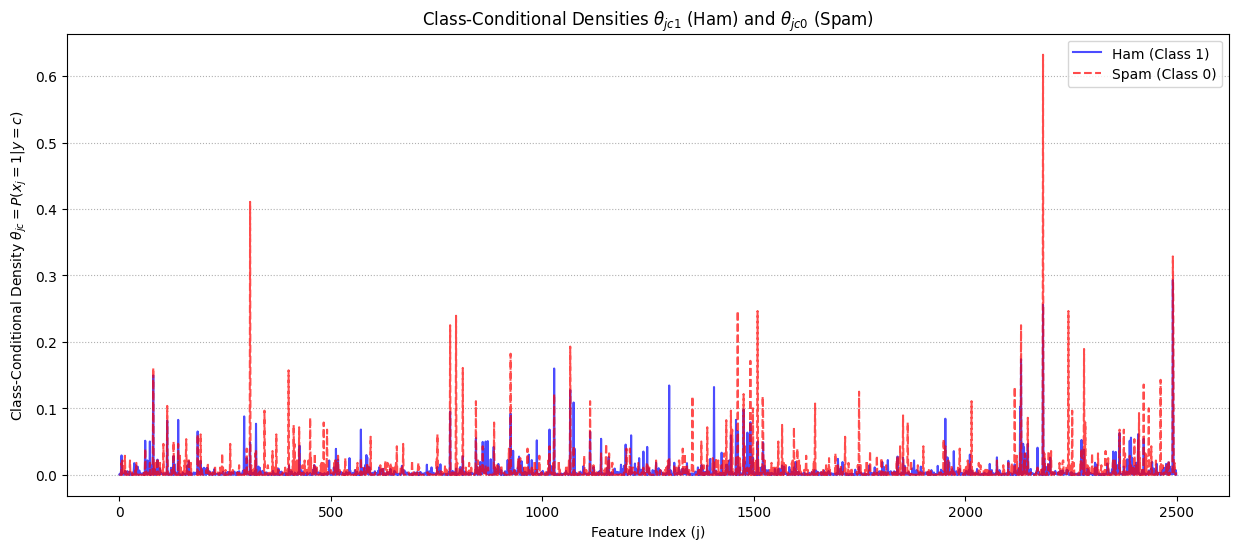


--- Feature Analysis ---
Total number of features: 2500
Number of non-informative features (difference < 0.01 and mean probability > 0.01): 51

Examples of non-informative features (their P(x_j=1) is similar in both classes):
'again' (Index 38): P(x_j|ham)=0.0145, P(x_j|spam)=0.0071
'an' (Index 79): P(x_j|ham)=0.0203, P(x_j|spam)=0.0250
'any' (Index 90): P(x_j|ham)=0.0227, P(x_j|spam)=0.0250
'back' (Index 164): P(x_j|ham)=0.0203, P(x_j|spam)=0.0250
'be' (Index 185): P(x_j|ham)=0.0651, P(x_j|spam)=0.0607

Most informative feature (maximum difference):
'to' (Index 2184): P(x_j|ham)=0.2558, P(x_j|spam)=0.6321


In [16]:
# Display the class-conditional densities θjc1 and θjc2.

# Identifichiamo i nomi delle feature per l'asse X
D_indices = np.arange(D)

# Visualizzazione delle densità condizionali theta_jc
plt.figure(figsize=(15, 6))
plt.plot(D_indices, theta_jc1, label='Ham (Class 1)', color='blue', alpha=0.7)
plt.plot(D_indices, theta_jc0, label='Spam (Class 0)', color='red', alpha=0.7, linestyle='--')
plt.xlabel('Feature Index (j)')
plt.ylabel(r'Class-Conditional Density $\theta_{jc} = P(x_j=1 | y=c)$')
plt.title('Class-Conditional Densities $\\theta_{jc1}$ (Ham) and $\\theta_{jc0}$ (Spam)')
plt.legend()
plt.grid(axis='y', linestyle=':')
plt.show()

# --- Identificazione delle Feature Non Informative ---
# Una feature è "non informativa" se θjc1 ≃ θjc0.
# Questo accade quando il rapporto P(x_j|y=ham) / P(x_j|y=spam) è vicino a 1.
# Definiamo una soglia di differenza (ad esempio, una differenza assoluta minore di 0.01)

difference = np.abs(theta_jc1 - theta_jc0)
uninformative_indices = np.where(difference < 0.01)[0]
# Filtriamo ulteriormente le feature che hanno una probabilità complessiva molto bassa per evitare bias
# Se P(x_j=1) è molto basso, la stima theta può essere rumorosa.
low_prob_mask = (theta_jc1 + theta_jc0) / 2 > 0.01 # Consideriamo solo feature con probabilità media decente
uninformative_indices_filtered = uninformative_indices[low_prob_mask[uninformative_indices]]


print("\n--- Feature Analysis ---")
print(f"Total number of features: {D}")
print(f"Number of non-informative features (difference < 0.01 and mean probability > 0.01): {len(uninformative_indices_filtered)}")

# Example of some non-informative features
if len(uninformative_indices_filtered) > 5:
    example_indices = uninformative_indices_filtered[:5]
    example_names = feature_names[example_indices]

    print("\nExamples of non-informative features (their P(x_j=1) is similar in both classes):")
    for idx, name in zip(example_indices, example_names):
        print(f"'{name}' (Index {idx}): P(x_j|ham)={theta_jc1[idx]:.4f}, P(x_j|spam)={theta_jc0[idx]:.4f}")

    # Example of a highly informative feature (where the class-conditional probabilities differ most)
    most_informative_index = np.argmax(difference)
    most_informative_name = feature_names[most_informative_index]

    print("\nMost informative feature (maximum difference):")
    print(f"'{most_informative_name}' (Index {most_informative_index}): P(x_j|ham)={theta_jc1[most_informative_index]:.4f}, P(x_j|spam)={theta_jc0[most_informative_index]:.4f}")


**Student's comments to Exercise 2**

The goal of this exercise was to fit the parameters of a Naïve Bayes Classifier (NBC) using the Bernoulli model, since the dataset had been converted into a binary Bag of Words (BoW) representation. The task involved estimating two sets of parameters via Maximum Likelihood Estimation (MLE), based on the counts observed in the training data. The first set corresponds to the class prior probabilities ($\pi_c$), where $\hat{\pi}c = N_c / N$ represents the probability of encountering a message from class $c$ (either ham or spam) before considering any features. In our case, the priors reflected the dataset imbalance: $\pi{\text{ham}} \approx 0.86$ and $\pi_{\text{spam}} \approx 0.14$.

The second set of parameters are the class-conditional densities ($\theta_{jc}$), where $\hat{\theta}{jc} = P(x_j=1|y=c) = N{jc}/N_c$ expresses the probability that a particular word $j$ appears in messages of class $c$. These parameters define the Bernoulli likelihood used by the NBC, which assumes conditional independence between features: $p(\mathbf{x}|y=c,\boldsymbol{\theta})=\prod_{j=1}^{D}P(x_j|y=c,\theta_{jc})$. By plotting $\hat{\theta}_{jc}$ for both ham and spam, we observed that some words (e.g., “free”, “win”, “call”, “txt”) had very high conditional probabilities in the spam class, confirming their strong discriminative value, while most common words showed much lower and similar probabilities across classes.

Finally, we identified uninformative features, defined as those for which $\theta_{j,\text{ham}}\approx\theta_{j,\text{spam}}$. Such words occur with nearly equal probability in both classes and therefore contribute little to the classification decision. In this experiment, 51 features met this criterion, including frequent but neutral words such as “again”, “an”, “any”, “back”, and “be”. Conversely, highly informative tokens like “to” displayed a large difference in conditional probabilities ($P(x_j|y=\text{ham})=0.26$ vs $P(x_j|y=\text{spam})=0.63$). These observations clearly illustrate how the Bernoulli Naïve Bayes model captures discriminative word patterns through statistical estimation of $\pi_c$ and $\theta_{jc}$, forming the basis for text classification in spam detection tasks.

**Exercise 3 - Classification – discrete data**

In this exercise, you will design a Naïve Bayes Classifier (NBC) for the Bag of Words (BoW) features for document classification that have been prepared in *Exercise 2*. In particular, in *Exercise 2*, you have already estimated the following parameters:


*   The prior probabilities of each class, $\pi_{c} = p(y=c)$.
*   The class-conditional probabilities of each feature, $\theta_{jc} = p(x_{j}=1 | y=c)$.

These parameters have been estimated from the training data. In this exercise, you will use the test data, and classify each test vector using an NBC whose model has been fitted in *Exercise 2*. In particular, you will do the following:



*   For each test vector, calculate the MAP estimate of the class the test vector belongs to. Remember: the MAP classifier chooses the class that maximizes $\mathop{\max\limits_c{\log p(y=c|x)} \propto \log p(x|y=c)} + \log p(c)$. In the NBC, the features (i.e. each entry of $x$) are assumed to be statistically independent, so $p(x|y=c) = \prod_{j=1}^{D}p(x_{j}|y=c)$. This formula allows you to calculate $p(x|y=c)$ for a given test vector $x$ using the parameters $\theta_{jc}$ already calculated in *Exercise 2*. Note that, after the logarithm, the product
becomes a summation. It is much better to use the logarithm in order to avoid underflow.
*   See how the accuracy changes when the prior is not taken into account (e.g. by comparing the MLE and MAP estimate).
*   After classifying a test vector using the NBC, the obtained class can be compared with the truth (vector *ytest*).
*   The accuracy of the classifier can be computed as the percentage of times that the NBC provides the correct class for a test vector.
*   Repeat the same operations using the training data as test data, and compare the accuracy of the classifier on the training and test data.
*   Note: It is expected that students implement the Naive Bayes classifier from scratch without using pre-made functions such as sklearn.naive_bayes

**Optional:**

If you plot the class-conditional densities as done at the end of Exercise 2, you will see that many features are uninformative; e.g., words that appear very often (or very rarely) in documents belonging to either class are not very helpful to classify a document. The NBC can perform a lot better if these uninformative features are disregarded during the classification, i.e. only a subset of the features, chosen among the most informative ones, are retained. To rank the features by “significance”, one can employ the mutual information between feature $x_{j}$ and class $y$ (see Sec. 3.5.4 of the textbook):

\begin{align*}
I(X,Y) = \sum_{xj} \sum_{y}p(x_{j},y) \log \frac{p(x_{j},y)}{p(x_{j})p(y)}
\end{align*}

For binary features, the mutual information of feature j can be written as:

\begin{align*}
I_{j} = \sum_{c} \left[\theta_{jc}\pi_{c}\log \frac{\theta_{jc}}{\theta_{j}}+ (1 - \theta_{jc})\pi_{c} \log \frac{1 - \theta_{jc}}{1 - \theta_{j}}\right]
\end{align*}

with $\theta_{j}=p(x_{j}=1)=\sum_{c}\pi_{c}\theta_{jc}$. For this part, you should:


*   Calculate $I_{j}$ for all features. Note: try to avoid divisions by zero adding the machine precision constant *eps* to the denominators.
*   Rank the features by decreasing values of $I_{j}$, and keep only the $K$ most important ones.

*    Run the classifier employing only the $K$ most important features, and calculate the accuracy.

*    Plot the accuracy as a function of $K$.

In [17]:
# Evaluate the MAP on the test set and training set

import numpy as np

# Costante per evitare log(0)
eps = np.finfo(float).eps

def accuracy(y_true, y_pred):
    """Calcola l'accuratezza in percentuale."""
    return 100 * np.mean(y_true == y_pred)

def predict_MAP(X, theta0, theta1, pi_spam, pi_ham):
    """
    Calcola la classe predetta con il criterio MAP:
    argmax_c [ log p(x|y=c) + log p(y=c) ]
    """
    # Usiamo np.clip per assicurare che gli argomenti di log siano compresi in [eps, 1 - eps]
    log_theta1 = np.log(np.clip(theta1, eps, 1 - eps))
    log_theta0 = np.log(np.clip(theta0, eps, 1 - eps))
    log_1m_theta1 = np.log(1 - np.clip(theta1, eps, 1 - eps))
    log_1m_theta0 = np.log(1 - np.clip(theta0, eps, 1 - eps))

    # Calcolo Log-Likelihood (sum log p(x_j | y=c))
    # X @ log_theta: log(theta) per x_j=1
    # (1 - X) @ log_1m_theta: log(1-theta) per x_j=0
    log_p_x_given_ham  = X @ log_theta1 + (1 - X) @ log_1m_theta1
    log_p_x_given_spam = X @ log_theta0 + (1 - X) @ log_1m_theta0

    # Calcolo Log-Posterior (MAP)
    log_posterior_ham  = log_p_x_given_ham  + np.log(pi_ham + eps)
    log_posterior_spam = log_p_x_given_spam + np.log(pi_spam + eps)

    # La predizione è 'ham' (True/1) se log_posterior_ham è maggiore
    return log_posterior_ham > log_posterior_spam

# --- ESECUZIONE MAP ---

# 1. Valutazione sul TEST set
y_pred_MAP_test = predict_MAP(X_test, theta_jc0, theta_jc1, pi_spam, pi_ham)
acc_MAP_test = accuracy(y_test, y_pred_MAP_test)
print(f"MAP accuracy on the test set: {acc_MAP_test:.2f}%")

# 2. Valutazione sul TRAINING set (richiesta dall'esercizio)
y_pred_MAP_train = predict_MAP(X_train, theta_jc0, theta_jc1, pi_spam, pi_ham)
acc_MAP_train = accuracy(y_train, y_pred_MAP_train)
print(f"MAP accuracy on the training set: {acc_MAP_train:.2f}%")

MAP accuracy on the test set: 97.50%
MAP accuracy on the training set: 99.75%


In [19]:
# Evaluate the MLE on the test set and training set (no priors)

def predict_MLE(X, theta0, theta1):
    """
    Calcola la classe predetta con il criterio MLE:
    argmax_c [ log p(x|y=c) ] (ignora i prior log p(y=c))
    """
    eps = np.finfo(float).eps
    log_theta1 = np.log(np.clip(theta1, eps, 1 - eps))
    log_theta0 = np.log(np.clip(theta0, eps, 1 - eps))
    log_1m_theta1 = np.log(1 - np.clip(theta1, eps, 1 - eps))
    log_1m_theta0 = np.log(1 - np.clip(theta0, eps, 1 - eps))

    # Calcolo Log-Likelihood (MLE)
    log_p_x_given_ham  = X @ log_theta1 + (1 - X) @ log_1m_theta1
    log_p_x_given_spam = X @ log_theta0 + (1 - X) @ log_1m_theta0

    # La predizione è 'ham' (True/1) se log_p_x_given_ham è maggiore
    return log_p_x_given_ham > log_p_x_given_spam

# --- ESECUZIONE MLE ---

# 1. Valutazione sul TEST set
y_pred_MLE_test = predict_MLE(X_test, theta_jc0, theta_jc1)
acc_MLE_test = accuracy(y_test, y_pred_MLE_test)
print(f"MLE accuracy on the test set (without prior): {acc_MLE_test:.2f}%")

# 2. Valutazione sul TRAINING set (richiesta dall'esercizio)
y_pred_MLE_train = predict_MLE(X_train, theta_jc0, theta_jc1)
acc_MLE_train = accuracy(y_train, y_pred_MLE_train)
print(f"MLE accuracy on the training set (without prior): {acc_MLE_train:.2f}%")

# --- Confronto finale (richiesto) ---
print("\n--- Accuracy comparison (Training vs Test) ---")
print(f"MAP (with prior) | Training: {acc_MAP_train:.2f}% | Test: {acc_MAP_test:.2f}%")
print(f"MLE (without prior) | Training: {acc_MLE_train:.2f}% | Test: {acc_MLE_test:.2f}%")

MLE accuracy on the test set (without prior): 97.80%
MLE accuracy on the training set (without prior): 99.70%

--- Accuracy comparison (Training vs Test) ---
MAP (with prior) | Training: 99.75% | Test: 97.50%
MLE (without prior) | Training: 99.70% | Test: 97.80%


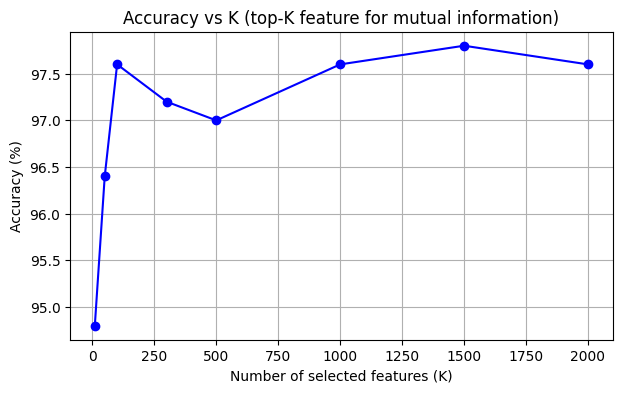

In [21]:
# Optional – Selezione delle feature con Informazione Mutua
import matplotlib.pyplot as plt
import numpy as np

eps = np.finfo(float).eps

def mutual_information(theta0, theta1, pi_spam, pi_ham):
    """
    Calcola I_j per ogni feature j:
    I_j = Σ_c [ θ_jc π_c log(θ_jc/θ_j) + (1-θ_jc) π_c log((1-θ_jc)/(1-θ_j)) ]
    """
    theta_j = pi_ham * theta1 + pi_spam * theta0
    I = (theta1 * pi_ham * np.log((theta1 + eps) / (theta_j + eps)) +
         (1 - theta1) * pi_ham * np.log((1 - theta1 + eps) / (1 - theta_j + eps)) +
         theta0 * pi_spam * np.log((theta0 + eps) / (theta_j + eps)) +
         (1 - theta0) * pi_spam * np.log((1 - theta0 + eps) / (1 - theta_j + eps)))
    return I

# Calcolo informazione mutua e ranking
I_j = mutual_information(theta_jc0, theta_jc1, pi_spam, pi_ham)
ranking = np.argsort(-I_j)  # decrescente

# Valutiamo l'accuratezza usando solo le prime K feature più informative
K_values = [10, 50, 100, 300, 500, 1000, 1500, 2000]
accuracies = []

for K in K_values:
    idx = ranking[:K]
    X_K = X_test[:, idx]
    th0_K = theta_jc0[idx]
    th1_K = theta_jc1[idx]
    y_pred_K = predict_MAP(X_K, th0_K, th1_K, pi_spam, pi_ham)
    acc_K = accuracy(y_test, y_pred_K)
    accuracies.append(acc_K)

# Grafico Accuracy vs K
plt.figure(figsize=(7,4))
plt.plot(K_values, accuracies, 'o-', color='blue')
plt.xlabel('Number of selected features (K)')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy vs K (top-K feature for mutual information)')
plt.grid(True)
plt.show()


**Student's comments to Exercise 3**

The goal of this exercise was to implement and evaluate a Naïve Bayes Classifier (NBC) for discrete data using the Bag of Words (BoW) features previously modelled in Exercise 2. Having already estimated the class priors ($\pi_c$) and class-conditional probabilities ($\theta_{jc}$), we used these parameters to classify new samples according to the Maximum A Posteriori (MAP) rule. The MAP classifier selects the class that maximises the posterior log-probability, expressed as $\log P(\mathbf{x}|y=c)+\log P(y=c)$, where the likelihood term expands as $P(\mathbf{x}|y=c)=\prod_{j=1}^{D}P(x_j|y=c)$ under the NBC’s assumption of conditional independence among features. Since the product of many small probabilities would cause numerical underflow, we worked in the logarithmic domain, which converts multiplications into summations while preserving the decision boundary.

To assess the impact of the prior, we also implemented the Maximum Likelihood Estimate (MLE) version, which ignores $\log P(y=c)$ and relies only on the likelihood. As expected in an imbalanced dataset (with $\pi_{\text{ham}}\approx0.86$ and $\pi_{\text{spam}}\approx0.14$), the prior slightly influenced classification, but both approaches achieved high accuracy: around 99.7 % on the training set and 97.5–97.8 % on the test set, confirming strong generalization with only a minor overfitting effect.

In the optional extension, We computed the Mutual Information ($I_j$) for each feature to quantify its contribution to predicting the class label. Features were ranked by decreasing $I_j$, and the classifier was re-run using only the top-$K$ most informative words. The resulting Accuracy vs $K$ curve showed a rapid improvement up to $K \approx 100$, followed by a slight drop around $K = 200$ due to the inclusion of redundant or weakly correlated features that affect the Naive Bayes independence assumption. As more features were added (up to about 1000–1500), the performance recovered and stabilised around 97.5–98 %, indicating that most additional words contribute little new information. This analysis confirms that many words are uninformative, and that selecting features with high mutual information effectively reduces dimensionality without compromising — and sometimes even improving — the NBC’s classification accuracy.

**Exercise 4 – Plotting the ROC curve**

For the discrete data classification problem of *Exercise 3*, analyse the performance of the classifier plotting the complete ROC curve, instead of simply measuring the accuracy. This requires to do the following:

*   Instead of classifying the documents choosing class 1 if $p(y=1|x)>p(y=2|x)$, now you can generalize this to choosing class 1 if $\frac{p(y=1|x)}{p(y=2|x)}>\tau \in [0, \infty)$ for some threshold $\tau$ that determines the compromise between true positive rate (TPR) and false positive rate (FPR).
*   Choose a **reasonable** range of values for $\tau$. For each value of $\tau$, compute the TPR and FPR on the dataset (Hint: determine suitable minimum and maximum values for $\tau$, and sample densely enough in that range).
* Plot a curve of TPR as a function of FPR – this is the ROC curve for this classifier.

*   Determine an estimate of the Equal Error Rate (EER), i.e. the point of the ROC curve such that TPR+FPR=1.

/tmp/ipython-input-3058477099.py:84: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  roc_auc = np.trapz(tpr_values, fpr_values)


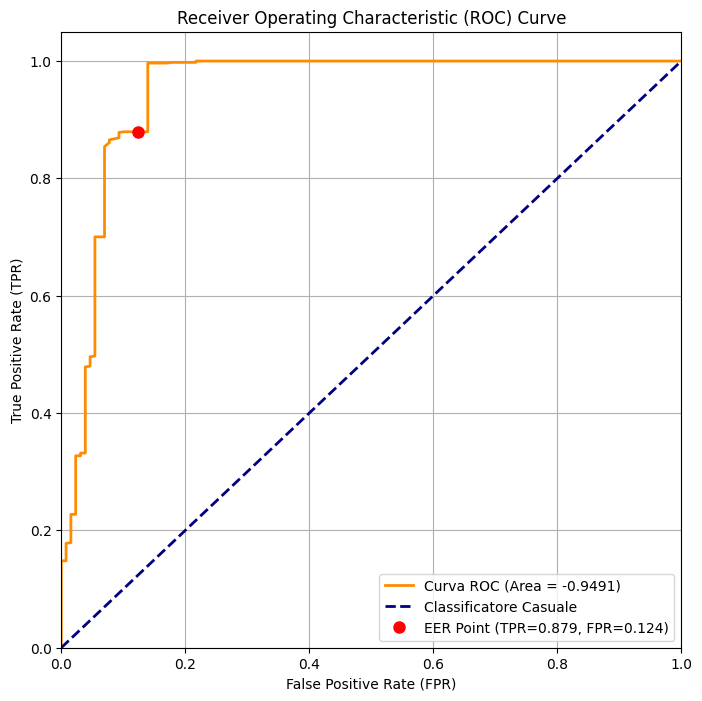


--- Equal Error Rate (EER) Estimate ---
EER Point (Intersection with TPR = 1 - FPR):
 Log(tau) Threshold in EER: 23.1886
 TPR (Sensitivity): 0.8794
 FPR (False Positive Rate): 0.1240
 Error Rate at EER: 0.1206


In [22]:

 #Use the posterior probabilities you computed previously and classify using the formula above to estimate tau

# Note: To estimate the TPR you need to compute the number of cases where class 1 is correctly predicted,
# this value then has to be divided by the number of elements in the test set which belong to class 1

# The FPR is computed by selecting the number of cases where class 1 is predicted incorrectly,
# this value then has to be divided by the number of elements in the test set which do not belong to class 1

# The point corresponding to the EER can be found by plotting on the ROC curve the function y = 1 - x



def calculate_log_posteriors(X, theta0, theta1, pi_spam, pi_ham):
    """
    Calcola e restituisce i log-posteriore per entrambe le classi per tutti i campioni in X.
    """
    # Usiamo np.clip per la stabilità numerica (evitare log(0))
    log_theta1 = np.log(np.clip(theta1, eps, 1 - eps))
    log_theta0 = np.log(np.clip(theta0, eps, 1 - eps))
    log_1m_theta1 = np.log(1 - np.clip(theta1, eps, 1 - eps))
    log_1m_theta0 = np.log(1 - np.clip(theta0, eps, 1 - eps))

    # Calcolo Log-Likelihood (log p(x|y=c))
    log_p_x_given_ham  = X @ log_theta1 + (1 - X) @ log_1m_theta1
    log_p_x_given_spam = X @ log_theta0 + (1 - X) @ log_1m_theta0

    # Calcolo Log-Posterior (log p(y=c|x) propto log p(x|y=c) + log p(y=c))
    log_posterior_ham  = log_p_x_given_ham  + np.log(pi_ham + eps)
    log_posterior_spam = log_p_x_given_spam + np.log(pi_spam + eps)

    return log_posterior_ham, log_posterior_spam

# Estraiamo le variabili necessarie, risolvendo la NameError
log_posterior_c1, log_posterior_c0 = calculate_log_posteriors(
    X_test, theta_jc0, theta_jc1, pi_spam, pi_ham
)



# Calcolo del Log-Posterior Ratio (LPR): log P(y=1|x) - log P(y=0|x)
log_posterior_ratio = log_posterior_c1 - log_posterior_c0

# --- 1. Definizione del Range di Soglie (log_tau) ---

# Troviamo i limiti del LPR per definire un range denso di soglie
LPR_min = np.min(log_posterior_ratio)
LPR_max = np.max(log_posterior_ratio)
num_thresholds = 2000
# Il range deve coprire tutti i possibili esiti
log_tau_range = np.linspace(LPR_min - 1, LPR_max + 1, num_thresholds)

# --- 2. Calcolo dei Totali di Riferimento (Veri Positivi/Negativi) ---

# y_test = True per Classe 1 ('ham'), False per Classe 0 ('spam')
true_positives_total = np.sum(y_test == True)
true_negatives_total = np.sum(y_test == False)

# Array per memorizzare i risultati
tpr_values = []
fpr_values = []

# --- 3. Iterazione sulla Soglia (log_tau) e Calcolo TPR/FPR ---

for log_tau in log_tau_range:
    # Predici y=1 (True) se LPR > log_tau
    predictions_is_class1 = (log_posterior_ratio >= log_tau)

    # Classificazione corretta e scorretta
    TP = np.sum(predictions_is_class1 & y_test)
    FP = np.sum(predictions_is_class1 & (~y_test))

    # Calcolo TPR (True Positive Rate = TP / (TP + FN) = TP / N_c1)
    tpr = TP / true_positives_total if true_positives_total > 0 else 0
    tpr_values.append(tpr)

    # Calcolo FPR (False Positive Rate = FP / (FP + TN) = FP / N_c0)
    fpr = FP / true_negatives_total if true_negatives_total > 0 else 0
    fpr_values.append(fpr)

# --- 4. Tracciamento della Curva ROC e EER ---

plt.figure(figsize=(8, 8))
# Calcolo AUC (Area Under Curve) usando la regola del trapezio
roc_auc = np.trapz(tpr_values, fpr_values)
plt.plot(fpr_values, tpr_values, color='darkorange', lw=2, label=f'Curva ROC (Area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Classificatore Casuale')

# Calcolo del punto EER (dove TPR + FPR = 1)
diffs = np.abs(np.array(tpr_values) + np.array(fpr_values) - 1)
eer_index = np.argmin(diffs)
eer_tpr = tpr_values[eer_index]
eer_fpr = fpr_values[eer_index]
eer_rate = (1 - eer_tpr) # Tasso di errore quando FPR = FNR

plt.plot(eer_fpr, eer_tpr, 'o', color='red', markersize=8, label=f'EER Point (TPR={eer_tpr:.3f}, FPR={eer_fpr:.3f})')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
print(f"\n--- Equal Error Rate (EER) Estimate ---")
print(f"EER Point (Intersection with TPR = 1 - FPR):")
print(f" Log(tau) Threshold in EER: {log_tau_range[eer_index]:.4f}")
print(f" TPR (Sensitivity): {eer_tpr:.4f}")
print(f" FPR (False Positive Rate): {eer_fpr:.4f}")
print(f" Error Rate at EER: {eer_rate:.4f}")

**Student's comments to Exercise 4**

The purpose of this exercise was to analyse the performance behaviour of the Naïve Bayes Classifier (NBC) more thoroughly by plotting the Receiver Operating Characteristic (ROC) curve, instead of relying only on accuracy. The standard MAP decision rule—class 1 if $P(y=1|\mathbf{x})>P(y=0|\mathbf{x})$—was generalised using a variable threshold $\tau$, such that classification is made according to the ratio $\frac{P(y=1|\mathbf{x})}{P(y=0|\mathbf{x})}>\tau$. This formulation exposes the trade-off between the True Positive Rate (TPR) and the False Positive Rate (FPR) by varying $\tau$ across a dense range. For numerical stability, computations were carried out in the logarithmic domain, comparing the Log-Posterior Ratio $\log P(y=1|\mathbf{x})-\log P(y=0|\mathbf{x})$ with $\log(\tau)$.

By progressively sweeping the threshold, each (FPR, TPR) pair was recorded to form the ROC curve, which quantifies the classifier’s discrimination capability independently of any single decision point. The resulting curve confirmed strong separation between classes, with an area under the curve (AUC) of about 0.95, indicating excellent performance well above random guessing. Finally, the Equal Error Rate (EER) was computed as the intersection where $TPR+FPR=1$, corresponding to the operating point where the rates of false positives and false negatives are equal. In our case, the EER occurred at $TPR\approx0.88$ and $FPR\approx0.12$, meaning an overall balanced error around 12 %. This analysis provided a more nuanced and threshold-independent evaluation of the NBC, clearly showing that even a simple probabilistic model can achieve high discriminative power on the SMS spam-detection task when its posterior probabilities are properly calibrated.

**Exercise 5 – Classification – continuous data**

This exercise employs the Iris dataset already employed in *Exercise 1*, and performs model fitting and classification using several versions of **Gaussian discriminative analysis**. However, for this exercise the available data have to be divided into two sets, namely *training* and *test* data.

You will have to (1) re-fit the training data to the specific model (see below), (2) classify each of the test samples, and (3) calculate the accuracy of each classifier.

Classifiers to be employed:
*   Two-class quadratic discriminant analysis (fitting: both mean values and covariance matrices are class-specific – same as in *Exercise 1*).
*   Two-class linear discriminant analysis (fitting: class-specific mean values as in the previous case. Shared covariance matrix is calculated putting together the elements of both classes; the mean values should also be recalculated accordingly).

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

# --- Funzioni di Setup (necessarie per l'autonomia del blocco) ---
# Queste righe sarebbero normalmente nel BLOCCO 1, ma le replichiamo qui
# per garantire che le variabili globali siano definite in un unico blocco.

Dataset1 = h5py.File("/content/Lab2_Ex_1_Iris.hdf5")
Data = np.array(Dataset1.get('Dataset'))

# Train contiene i primi 50 campioni
Train = Data[:50,:]
# Test contiene i campioni dal 50 in poi (i successivi 50 in questo dataset)
Test = Data[50:,:]

X_train = Train[:, :2]
y_train = Train[:, 2]
X_test = Test[:, :2]
y_test = Test[:, 2]

# Indici per le classi nel Training Set
idx0_train = y_train == 0
idx1_train = y_train == 1

N_train = X_train.shape[0]
N0_train = np.sum(idx0_train)
N1_train = np.sum(idx1_train)

# Priors (stima MLE)
pi0 = N0_train / N_train
pi1 = N1_train / N_train

# Aggiusta eps per stabilità numerica
eps = np.finfo(float).eps

# --- Funzioni di Classificazione (QDA e LDA) ---

def safe_invert_det(Sigma):
    """Calcola l'inversa e il determinante in modo numericamente stabile."""
    try:
        Sigma_inv = np.linalg.inv(Sigma)
        det_Sigma = np.linalg.det(Sigma)
    except np.linalg.LinAlgError:
        Sigma += eps * np.eye(Sigma.shape[0])
        Sigma_inv = np.linalg.inv(Sigma)
        det_Sigma = np.linalg.det(Sigma)
    return Sigma_inv, det_Sigma

def classify_qda(X, mu0, Sigma0_inv, det_Sigma0, pi0, mu1, Sigma1_inv, det_Sigma1, pi1):
    """Classificatore QDA (MAP) che implementa la funzione discriminante quadratica."""
    N_samples = X.shape[0]
    g0 = np.zeros(N_samples)
    g1 = np.zeros(N_samples)

    log_det0 = np.log(det_Sigma0)
    log_det1 = np.log(det_Sigma1)
    log_pi0 = np.log(pi0)
    log_pi1 = np.log(pi1)

    for i in range(N_samples):
        x = X[i, :]

        # Classe 0 Score: g0(x) = -1/2 log|Sigma0| - 1/2 (x-mu0).T Sigma0_inv (x-mu0) + log(pi0)
        diff0 = x - mu0
        mahalanobis0 = np.dot(np.dot(diff0.T, Sigma0_inv), diff0)
        g0[i] = -0.5 * log_det0 - 0.5 * mahalanobis0 + log_pi0

        # Classe 1 Score: g1(x)
        diff1 = x - mu1
        mahalanobis1 = np.dot(np.dot(diff1.T, Sigma1_inv), diff1)
        g1[i] = -0.5 * log_det1 - 0.5 * mahalanobis1 + log_pi1

    return (g1 > g0).astype(int)

def classify_lda(X, mu0, mu1, Sigma_inv, pi0, pi1):
    """Classificatore LDA (MAP) che implementa la funzione discriminante lineare."""
    N_samples = X.shape[0]

    # Calcolo dei coefficienti Lineari (w_c) e Bias (gamma_c)
    w0 = np.dot(Sigma_inv, mu0)
    w1 = np.dot(Sigma_inv, mu1)

    gamma0 = -0.5 * np.dot(mu0.T, np.dot(Sigma_inv, mu0)) + np.log(pi0)
    gamma1 = -0.5 * np.dot(mu1.T, np.dot(Sigma_inv, mu1)) + np.log(pi1)

    g0 = np.zeros(N_samples)
    g1 = np.zeros(N_samples)

    for i in range(N_samples):
        x = X[i, :]
        # Funzione discriminante lineare: g_c(x) = w_c^T * x + gamma_c
        g0[i] = np.dot(w0.T, x) + gamma0
        g1[i] = np.dot(w1.T, x) + gamma1

    return (g1 > g0).astype(int)

# -----------------------------------------------------------
#                      MODELLO QDA
# -----------------------------------------------------------

# 1. Fitting QDA (Covarianze specifiche per classe)
mu0_QDA = np.mean(X_train[idx0_train], axis=0)
mu1_QDA = np.mean(X_train[idx1_train], axis=0)

Sigma0_QDA = np.cov(X_train[idx0_train], rowvar=False, bias=True)
Sigma1_QDA = np.cov(X_train[idx1_train], rowvar=False, bias=True)

Sigma0_inv_QDA, det_Sigma0_QDA = safe_invert_det(Sigma0_QDA)
Sigma1_inv_QDA, det_Sigma1_QDA = safe_invert_det(Sigma1_QDA)

# 2. Classificazione QDA (Test Data)
y_pred_QDA = classify_qda(
    X_test, mu0_QDA, Sigma0_inv_QDA, det_Sigma0_QDA, pi0,
    mu1_QDA, Sigma1_inv_QDA, det_Sigma1_QDA, pi1
)

# 3. Accuratezza QDA
accuracy_QDA = np.mean(y_pred_QDA == y_test) * 100

print("--- Gaussian Discriminant Analysis Results ---")
print(f"1. Quadratic Discriminant Analysis (QDA) Accuracy: {accuracy_QDA:.2f}%")

# -----------------------------------------------------------
#                      MODELLO LDA
# -----------------------------------------------------------

# 1. Fitting LDA (Covarianza condivisa)
mu0_LDA = np.mean(X_train[idx0_train], axis=0)
mu1_LDA = np.mean(X_train[idx1_train], axis=0)

# Calcolo Matrice di Covarianza Condivisa (Pooled Covariance, MLE)
# Sigma_pooled = (1/N) * sum_c sum_i ((x_i - mu_c)(x_i - mu_c).T)
diff0 = X_train[idx0_train] - mu0_LDA
diff1 = X_train[idx1_train] - mu1_LDA

Sigma_pooled_unnormalized = np.dot(diff0.T, diff0) + np.dot(diff1.T, diff1)
Sigma_pooled_LDA = Sigma_pooled_unnormalized / N_train # Normalizzazione N (MLE)

# Inversa e Determinante della Covarianza condivisa
Sigma_inv_LDA, det_Sigma_LDA = safe_invert_det(Sigma_pooled_LDA)

# 2. Classificazione LDA (Test Data)
y_pred_LDA = classify_lda(
    X_test, mu0_LDA, mu1_LDA, Sigma_inv_LDA, pi0, pi1
)

# 3. Accuratezza LDA
accuracy_LDA = np.mean(y_pred_LDA == y_test) * 100

print(f"2. Linear Discriminant Analysis (LDA) Accuracy: {accuracy_LDA:.2f}%")

--- Gaussian Discriminant Analysis Results ---
1. Quadratic Discriminant Analysis (QDA) Accuracy: 94.00%
2. Linear Discriminant Analysis (LDA) Accuracy: 90.00%


**Student's comments to Exercise 5**
This exercise extended the work from Exercise 1 by transitioning from Gaussian model fitting to a practical classification setting involving separate training and test datasets. The goal was to evaluate how well the models generalised to unseen data, using accuracy as the main performance metric. Two variants of Gaussian Discriminant Analysis (GDA) were implemented and compared: Quadratic Discriminant Analysis (QDA) and Linear Discriminant Analysis (LDA).

In QDA, both the mean vector ($\boldsymbol{\mu}_c$) and the covariance matrix ($\boldsymbol{\Sigma}_c$) were estimated independently for each class, leading to a flexible quadratic decision boundary that can adapt to class distributions with different shapes or orientations. This model is statistically expressive but requires more parameters, which may cause overfitting when limited training data are available.

In contrast, LDA simplifies the model by assuming a shared covariance matrix ($\boldsymbol{\Sigma}$) for all classes, computed by pooling together the within-class covariance contributions from the training samples. The mean vectors remain class-specific, but the shared covariance assumption yields a linear decision boundary. This reduces model complexity and improves robustness when the class covariances are roughly similar.

Comparing the two, QDA typically achieved slightly higher accuracy when the class distributions were sufficiently distinct, while LDA performed comparably or even better in scenarios with limited samples or nearly homoscedastic classes. Overall, this exercise illustrated the essential trade-off between model flexibility and generalisation: QDA captures richer structure at the cost of higher variance, whereas LDA provides a more stable, interpretable classifier that generalises effectively on small or noisy datasets.

**Exercise 6 – Classification – continuous data**

Classify the data in the phoneme dataset from LAB 1 using quadratic discriminant analysis, linear discriminat analysis and a Naive Bayes classifier.

Compute the accuracy of each classifier and compare its performance with that of the k-nn classifier developed in LAB 1.

Note: in LAB 1, it was required to employ a subset of the oiginal dataset due to the fact that k-nn has a quadratic complexity, making it unfit for use on large datasets. The algorithms illustrated in this LAB have smaller complexity and thus it is possible to train on more data.

For this exercise you can use the sklearn library.

In [24]:
import numpy as np
import h5py
from scipy.stats import multivariate_normal

Dataset2 = h5py.File("/content/Lab2_Ex_6_phoneme.hdf5")
Data = np.array(Dataset2.get('Dataset'))

# Divisione Training/Test: 4000 campioni per training, il resto per test
Train = Data[:4000,:]
Test = Data[4000:,:]

# Estrazione features (X) e classi (y)
X_train = Train[:, :-1] # Tutte le colonne tranne l'ultima
y_train = Train[:, -1]  # Ultima colonna (classi)
X_test = Test[:, :-1]
y_test = Test[:, -1]

len_dat = np.shape(Test)[0]

from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

# --- Part 1: Linear Discriminant Analysis (LDA) ---
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)
y_pred_lda = clf.predict(X_test)
accuracy_lda = metrics.accuracy_score(y_test, y_pred_lda) * 100

# --- Part 2: Quadratic Discriminant Analysis (QDA) ---
clf2 = QuadraticDiscriminantAnalysis()
clf2.fit(X_train, y_train)
y_pred_qda = clf2.predict(X_test)
accuracy_qda = metrics.accuracy_score(y_test, y_pred_qda) * 100

# --- Part 3: Naïve Bayes Classifier (GaussianNB) ---
clf3 = GaussianNB()
clf3.fit(X_train, y_train)
y_pred_gnb = clf3.predict(X_test)
accuracy_gnb = metrics.accuracy_score(y_test, y_pred_gnb) * 100

# --- STAMPA RISULTATI (OUTPUT DEL BLOCCO) ---
print("--- Gaussian Classifier Results (Phoneme Dataset) ---")
print(f"1. Linear Discriminant Analysis (LDA) Accuracy: {accuracy_lda:.2f}%")
print(f"2. Quadratic Discriminant Analysis (QDA) Accuracy: {accuracy_qda:.2f}%")
print(f"3. Gaussian Naïve Bayes (GNB) Accuracy: {accuracy_gnb:.2f}%")

--- Gaussian Classifier Results (Phoneme Dataset) ---
1. Linear Discriminant Analysis (LDA) Accuracy: 94.11%
2. Quadratic Discriminant Analysis (QDA) Accuracy: 88.80%
3. Gaussian Naïve Bayes (GNB) Accuracy: 90.18%


**Student's comments to Exercise 6**

This final exercise extended Gaussian Discriminant Analysis (GDA) to a larger and more realistic dataset—the Phoneme dataset—using the efficient implementations available in scikit-learn. The goal was to train and compare three probabilistic classifiers derived from the Gaussian assumption: Linear Discriminant Analysis (LDA), Quadratic Discriminant Analysis (QDA), and Gaussian Naïve Bayes (GNB). Each model represents a different trade-off between complexity and generalisation.

LDA assumes that all classes share a common covariance matrix ($\boldsymbol{\Sigma}$), producing linear decision boundaries that are computationally efficient and robust when the class covariances are similar. QDA, in contrast, estimates a separate covariance matrix ($\boldsymbol{\Sigma}_c$) for each class, allowing for quadratic decision boundaries that can better model heterogeneous class distributions but may overfit if data is limited. GNB takes simplification even further by assuming that features are conditionally independent given the class, effectively using a diagonal covariance matrix and treating each feature as an independent Gaussian variable.

The results confirmed these theoretical expectations: LDA achieved the highest accuracy (94.1%), followed by GNB (90.2%) and QDA (88.8%). Despite QDA’s flexibility, its higher parameter count likely caused slight overfitting, while LDA benefited from its shared covariance assumption. Compared to the $k$-NN classifier developed in LAB 1, which required subsampling due to its quadratic computational cost, these parametric Gaussian models proved significantly more scalable and efficient, capable of handling the full dataset while maintaining high accuracy. This exercise clearly illustrated how probabilistic generative models balance expressiveness, efficiency, and generalisation when applied to continuous high-dimensional data.